# Wildfire Analysis

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import plotly.express as px

In [160]:
# read in csv
file_path = "static/data/wildfires_updated.csv"  

df = pd.read_csv(file_path)  
 
df.head(10) 

,fire_id,county_id,month_number,year,state,wildfire_name,acres_burned,counties,location,latitude,longitude,start_datetime,extinguished_datetime,duration_days
0,1581,12,1,2019,CA,Pilot Fire,30.0,Humboldt,"Pilot Ridge Rd & USFS Route 1, southwest of Wi...",40.618056,-123.675556,2019-01-01T14:14:00Z,2019-01-15T10:38:00Z,13
1,1630,4,4,2019,CA,Cana Fire,10.0,Butte,"Off Hamilton Nord Cana Hwy & Cana Hwy, northea...",39.839580,-121.957000,2019-04-30T12:20:00Z,2019-05-08T08:47:00Z,7
2,1504,15,4,2019,CA,Woody Fire,115.0,Kern,"Woody Rd & Horseshoe Ranch Rd, northeast of Ba...",35.651890,-118.925450,2019-04-30T18:37:00Z,2019-05-08T08:47:00Z,7
3,1482,16,4,2019,CA,York Fire,161.0,Kings,"Hwy 41 and York Ave, 13 miles south of Avenal ...",35.817780,-120.097150,2019-04-28T22:20:00Z,2019-06-24T11:45:00Z,56
4,1580,33,4,2019,CA,Girasol Fire,30.0,Riverside,"Hwy 111 and Tramway Rd, Palm Springs",0.000000,0.000000,2019-04-09T22:18:00Z,2019-04-10T10:23:00Z,0
5,1556,4,5,2019,CA,Meridian Fire,50.0,Butte,"Off Munjar Rd, north of Chico",39.854840,-121.905000,2019-05-01T16:46:00Z,2019-05-08T08:47:00Z,6
6,1501,10,5,2019,CA,Hill Fire,121.0,Fresno,"S. Hills Valley Road, north of Orange Cove",36.669090,-119.304600,2019-05-29T17:18:00Z,2019-06-05T15:07:00Z,6
7,1414,15,5,2019,CA,Refuge Fire,2500.0,Kern,"off Twisselmen Road, in the Kern National Wild...",35.720570,-119.627620,2019-05-07T15:47:00Z,2019-05-09T09:37:00Z,1
8,1479,15,5,2019,CA,Vulcan Fire,172.0,Kern,Off Highway 166 at Wind Wolves Preserve,35.038550,-119.194540,2019-05-03T15:04:00Z,2019-05-08T08:48:00Z,4
9,1539,31,5,2019,CA,Sugar Fire,65.0,Placer,"Sugar Pine Road and Big Reservoir Lane, northe...",39.115360,-120.760880,2019-05-10T14:14:00Z,2019-05-24T14:28:00Z,14


In [62]:
# return month name
import calendar
df['month_name'] = df['month_number'].apply(lambda x: calendar.month_abbr[x])
df["month_name"]

0      Jan
1      Apr
2      Apr
3      Apr
4      Apr
      ... 
259    Nov
260    Nov
261    Nov
262    Nov
263    Nov
Name: month_name, Length: 264, dtype: object

In [63]:
# check columns
df.head()

,fire_id,county_id,month_number,year,state,wildfire_name,acres_burned,counties,location,latitude,longitude,start_datetime,extinguished_datetime,duration_days,month_name
0,1581,12,1,2019,CA,Pilot Fire,30.0,Humboldt,"Pilot Ridge Rd & USFS Route 1, southwest of Wi...",40.618056,-123.675556,2019-01-01T14:14:00Z,2019-01-15T10:38:00Z,13,Jan
1,1630,4,4,2019,CA,Cana Fire,10.0,Butte,"Off Hamilton Nord Cana Hwy & Cana Hwy, northea...",39.839580,-121.957000,2019-04-30T12:20:00Z,2019-05-08T08:47:00Z,7,Apr
2,1504,15,4,2019,CA,Woody Fire,115.0,Kern,"Woody Rd & Horseshoe Ranch Rd, northeast of Ba...",35.651890,-118.925450,2019-04-30T18:37:00Z,2019-05-08T08:47:00Z,7,Apr
3,1482,16,4,2019,CA,York Fire,161.0,Kings,"Hwy 41 and York Ave, 13 miles south of Avenal ...",35.817780,-120.097150,2019-04-28T22:20:00Z,2019-06-24T11:45:00Z,56,Apr
4,1580,33,4,2019,CA,Girasol Fire,30.0,Riverside,"Hwy 111 and Tramway Rd, Palm Springs",0.000000,0.000000,2019-04-09T22:18:00Z,2019-04-10T10:23:00Z,0,Apr


In [139]:
# get count of wildfires per month and county
fires_count = df.groupby(["month_number", "month_name"]).wildfire_name.count()
count_per_month_df =pd.DataFrame({"fire_count": fires_count})
count_per_month_df

,,fire_count
month_number,month_name,
1,Jan,1
4,Apr,4
5,May,13
6,Jun,41
7,Jul,46
8,Aug,45
9,Sep,52
10,Oct,56
11,Nov,6


In [140]:
count_per_month_df = count_per_month_df.reset_index()
count_per_month_df 

,month_number,month_name,fire_count
0,1,Jan,1
1,4,Apr,4
2,5,May,13
3,6,Jun,41
4,7,Jul,46
5,8,Aug,45
6,9,Sep,52
7,10,Oct,56
8,11,Nov,6


# Wildfires per Month Bar Chart

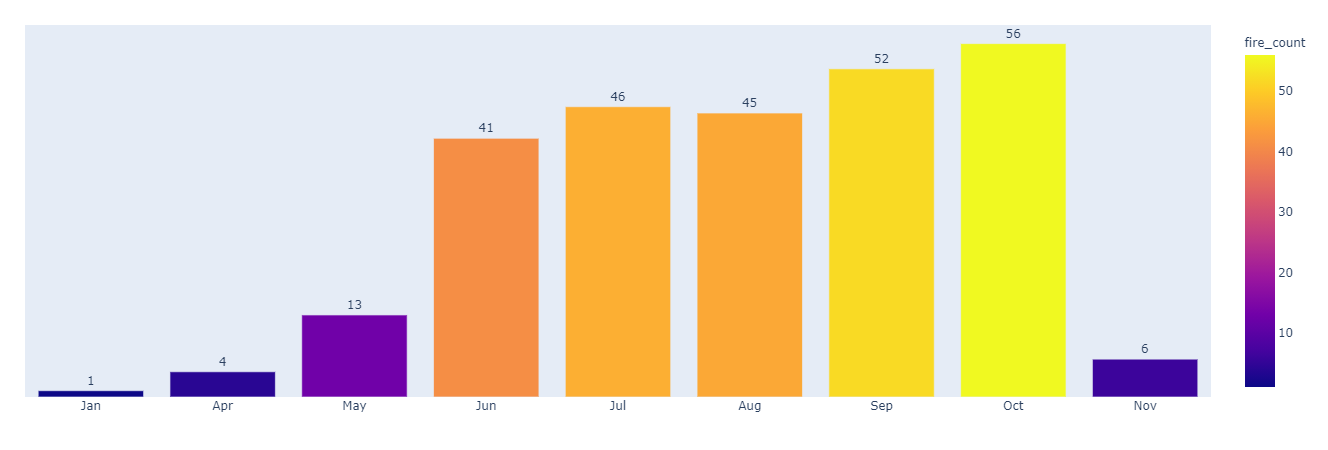

In [159]:
# wildfires per month

fig = px.bar(count_per_month_df, x='month_name', y='fire_count', color='fire_count', orientation='v',
             text='fire_count',labels={
                     "month_name":""
                 },)
fig.update_layout(xaxis={'visible': True}, yaxis={'visible': False})
fig.update_layout(
    margin=dict(l=25, r=25, t=25, b=25),
    paper_bgcolor="White",
)
fig.update_traces(texttemplate='%{text:}',textposition='outside')
fig.write_image("static/images/fire_per_month_bar.png")
fig.show()

# Wildfires per County Bar chart

In [153]:
# get count of wildfires per county
fires_count_county = df.groupby(["counties"]).wildfire_name.count()
count_per_county_df =pd.DataFrame({"fire_counts": fires_count_county})
count_per_county_df

,fire_counts
counties,
Alameda,9
Amador,1
Butte,9
Calaveras,2
Colusa,1
Contra Costa,9
El Dorado,6
Fresno,3
Glenn,1


In [154]:
count_per_county_df = count_per_county_df.reset_index()
count_per_county_df 

,counties,fire_counts
0,Alameda,9
1,Amador,1
2,Butte,9
3,Calaveras,2
4,Colusa,1
5,Contra Costa,9
6,El Dorado,6
7,Fresno,3
8,Glenn,1
9,Humboldt,1


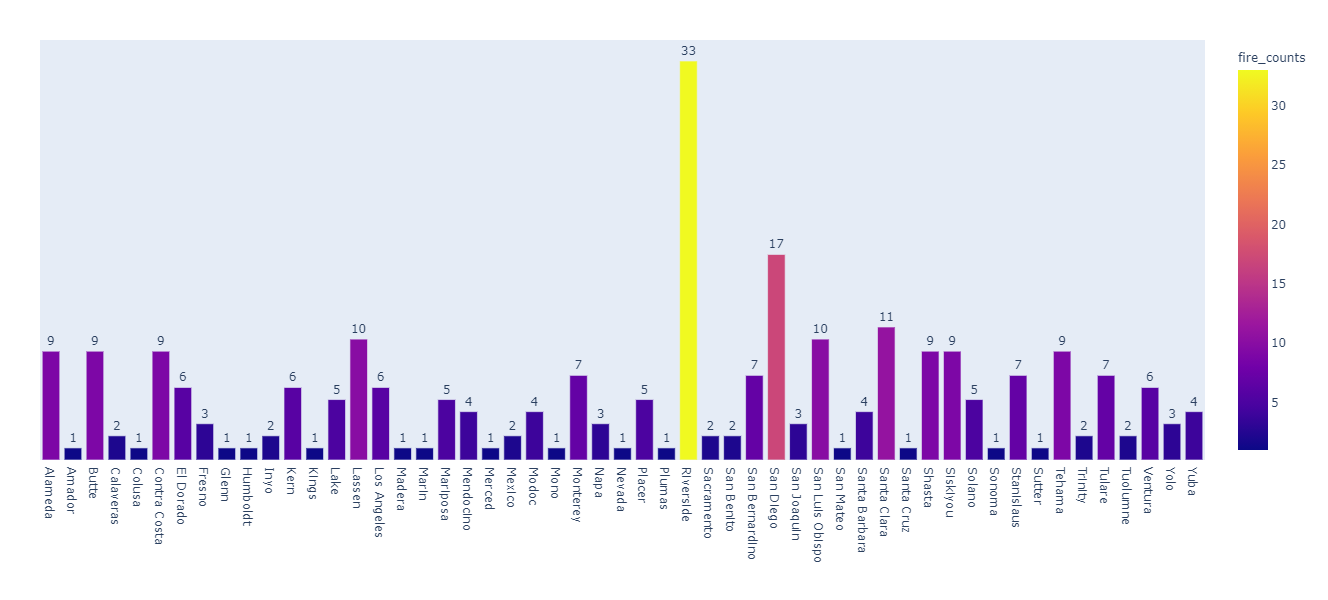

In [158]:
# wildfires count by county bar chart

fig = px.bar(count_per_county_df, x='counties', y='fire_counts', color='fire_counts', orientation='v',
             text='fire_counts', width=1400, height=600, labels={
                     "counties":""
                 },)
fig.update_layout(xaxis={'visible': True}, yaxis={'visible': False})
fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    paper_bgcolor="White",
)
fig.update_traces(texttemplate='%{text:}',textposition='outside')
fig.write_image("static/images/fire_per_county_bar.png")
fig.show()